In [21]:
import sys

sys.path.append("../partitioning")
sys.path.append("../benchmarks/benchmarking graphs")

In [22]:
from full_pipeline import UnifiedPortfolioOptimizer

In [23]:
optimizer = UnifiedPortfolioOptimizer(
    "benchmarking graphs\subgraph_150.pickle"
)

In [24]:
results = optimizer.run_comparison(
    partition_size=15, K_total=40, q=0.5, p=5, max_partition_size=20
)


PORTFOLIO OPTIMIZATION COMPARISON - 150 Assets

Partitioning into ~15-asset subproblems...
Maximum partition size: 20


c:\Users\marlo\anaconda3\envs\JPMorganChallenge2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Created 13 partitions
Partition sizes: [20, 3, 20, 4, 18, 6, 20, 4, 12, 15, 15, 4, 9]
K distribution: [5, 0, 5, 1, 4, 1, 5, 1, 3, 4, 4, 1, 6] (total: 40)

------------------------------------------------------------
CLASSICAL GLOBAL OPTIMIZATION
------------------------------------------------------------
Objective: -383.074806
Time: 0.84s

------------------------------------------------------------
CLASSICAL PARTITIONED OPTIMIZATION
------------------------------------------------------------
Objective: -9.510632
vs Global: +97.5%
Time: 0.46s

FINAL COMPARISON SUMMARY

Problem: 150 assets, 13 partitions, K=40

📊 OBJECTIVE VALUES (lower is better):
  Classical Global:      -383.074806 (baseline)
  Classical Partitioned: -9.510632 (+97.5%)

📈 APPROXIMATION RATIOS (higher is better):

⏱️ COMPUTATION TIME:
  Classical:   1.31s

🔬 QUANTUM ADVANTAGE ANALYSIS:

📝 Classical partitioned approach currently outperforms quantum methods.


In [25]:
optimizer.save_results(results, "./results")


✅ Results saved to ./results/


'./results\\comparison_summary_20250713_211417.json'

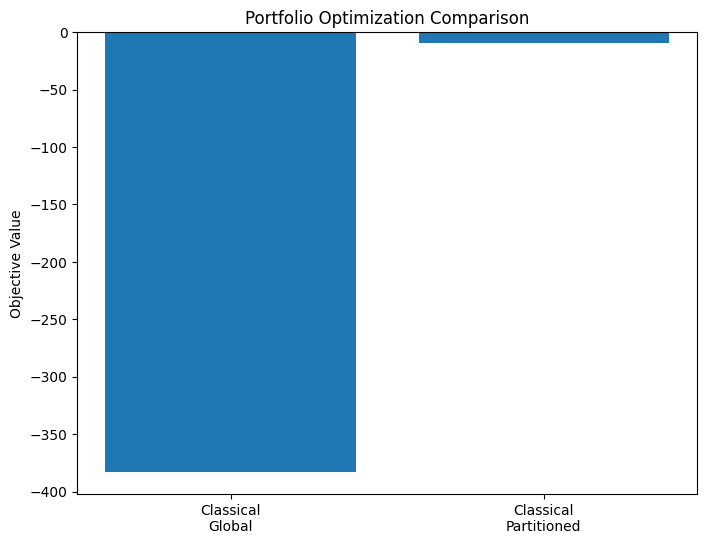

In [26]:
import matplotlib.pyplot as plt

methods = ["Classical\nGlobal", "Classical\nPartitioned"]
objectives = [
    results.classical_global_objective,
    results.classical_partitioned_objective,
]

if results.qokit_objective:
    methods.append("QOKit")
    objectives.append(results.qokit_objective)

if results.gpt_objective:
    methods.append("GPT")
    objectives.append(results.gpt_objective)

plt.figure(figsize=(8, 6))
plt.bar(methods, objectives)
plt.ylabel("Objective Value")
plt.title("Portfolio Optimization Comparison")
plt.show()